In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
df=pd.read_csv("CRUDE.csv")


In [3]:
df.isnull().any()

Open      False
High      False
Low       False
Close     False
Volume    False
Target    False
dtype: bool

In [4]:
X = df.iloc[:,0:5]  #independent columns
Y = df.iloc[:,-1]

In [5]:
Xscalar=StandardScaler()
Yscalar=StandardScaler()
X=Xscalar.fit_transform(X)
Y=Y.values
Y=Y.reshape(-1,1)
Y=Yscalar.fit_transform(Y)


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 0)

In [7]:
#printing no of train and test examples and its size
print("No. of training examples:",X_train.shape[0],"and its size is(%d)"%(X_train.shape[1]))
print("No. of test examples :",X_test.shape[0],"and its size is(%d)"%(X_test.shape[1]))

No. of training examples: 6237 and its size is(5)
No. of test examples : 3072 and its size is(5)


In [8]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import SGD

Using TensorFlow backend.


In [9]:
#some model parameters
output_dim=1
input_dim=X_train.shape[1]
batch_size=50
nb_epoch=50

In [10]:
# define model
model = Sequential()
model.add(Dense(25, input_shape=(input_dim,), activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mean_squared_error'])


# The Input Layer :
#model.add(Dense(128, kernel_initializer='normal',input_shape=(input_dim,), activation='relu'))

# The Hidden Layers :
#model.add(Dense(256, kernel_initializer='normal',activation='relu'))
#model.add(Dense(256, kernel_initializer='normal',activation='relu'))
#model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
#model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
#model.compile(loss='mean_absolute_error', optimizer='sgd', metrics=['mean_absolute_error'])


In [11]:
#configuring model
history=model.fit(X_train,Y_train,batch_size=batch_size,epochs=nb_epoch,verbose=1,validation_data=[X_test,Y_test])

Train on 6237 samples, validate on 3072 samples
Epoch 1/50
6237/6237 [==============================] - 0s 60us/step - loss: 0.5696 - mean_squared_error: 0.5696 - val_loss: 0.2892 - val_mean_squared_error: 0.2892
Epoch 2/50
6237/6237 [==============================] - 0s 40us/step - loss: 0.2404 - mean_squared_error: 0.2404 - val_loss: 0.2100 - val_mean_squared_error: 0.2100
Epoch 3/50
6237/6237 [==============================] - 0s 39us/step - loss: 0.1788 - mean_squared_error: 0.1788 - val_loss: 0.1567 - val_mean_squared_error: 0.1567
Epoch 4/50
6237/6237 [==============================] - 0s 40us/step - loss: 0.1330 - mean_squared_error: 0.1330 - val_loss: 0.1164 - val_mean_squared_error: 0.1164
Epoch 5/50
6237/6237 [==============================] - 0s 41us/step - loss: 0.0534 - mean_squared_error: 0.0534 - val_loss: 0.0054 - val_mean_squared_error: 0.0054
Epoch 6/50
6237/6237 [==============================] - 0s 40us/step - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.

6237/6237 [==============================] - 0s 44us/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0015 - val_mean_squared_error: 0.0015


Train MSE : [0.0014425793075308392, 0.0014425793197005987] Test MSE: [0.0015305340693885228, 0.0015305341221392155]


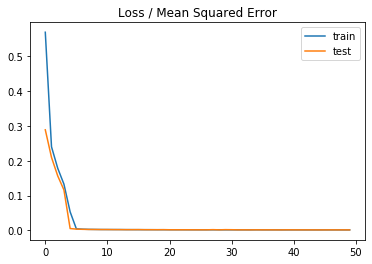

In [18]:
train_mse = model.evaluate(X_train, Y_train, verbose=0)
test_mse = model.evaluate(X_test, Y_test, verbose=0)
print('Train MSE :',train_mse,'Test MSE:', test_mse)

# plot loss during training
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


In [19]:
df_Test1=pd.read_csv("CRUDE_TEST.csv")


In [20]:
df_Test1.isnull().any()

Open      False
High      False
Low       False
Close     False
Volume    False
Target     True
dtype: bool

In [21]:
df_Test1=df_Test1.drop('Target',axis=1)

In [22]:
TestX=Xscalar.fit_transform(df_Test1)

In [23]:
Y_pred = model.predict(TestX)
print(Y_pred)

[[ 0.8026978 ]
 [ 1.0099536 ]
 [ 1.1710789 ]
 [ 1.1311793 ]
 [ 0.96553206]
 [ 0.39267108]
 [-0.89553523]
 [-0.57235134]
 [-0.8274524 ]
 [-0.5357683 ]
 [-1.1128823 ]]


In [24]:
Y_pred_inverse=Yscalar.inverse_transform(Y_pred)
Y_pred_inverse

array([[66.21552 ],
       [72.11366 ],
       [76.69901 ],
       [75.56354 ],
       [70.8495  ],
       [54.54687 ],
       [17.886738],
       [27.083994],
       [19.824257],
       [28.125086],
       [11.701415]], dtype=float32)